# Postprocessing of Generation results

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
idx_s=2
start_id = 0
end_id = 8
var_par='d1_plate'
unit=' [mm]'

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)
df_xy=pd.read_csv(xy_file_name)

In [19]:
df_xy

,Unnamed: 0,ID,d1_plate,L,b1,t_p,t_w,h_w,alpha_l,h_v,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,10.0,5800,9720,400,400,2580,90,0,...,1975.996216,-360.000000,eta_1_x,0,2.452818,225.948547,188.290451,-360.000000,eta_3_bot,0
1,1,1,12.0,5800,9720,400,400,2580,90,0,...,1975.996216,-352.941162,eta_1_x,0,2.788221,225.948547,152.941177,-1071.478027,eta_3_bot,0
2,2,2,14.0,5800,9720,400,400,2580,90,0,...,1975.996216,-352.941162,eta_1_x,0,3.003301,225.948547,152.941177,-1071.478027,eta_3_bot,0
3,3,3,16.0,5800,9720,400,400,2580,90,0,...,2506.003662,-352.941162,eta_1_x,0,3.130696,225.948547,152.941177,-1071.478027,eta_3_bot,0
4,4,4,18.0,5800,9720,400,400,2580,90,0,...,2506.003662,-352.941162,eta_1_x,0,3.207380,225.948547,1975.996216,-352.941162,eta_3_top,0
5,5,5,20.0,5800,9720,400,400,2580,90,0,...,2506.003662,-352.941162,eta_1_x,0,3.256554,225.948547,1975.996216,-352.941162,eta_3_top,0
6,6,6,22.0,5800,9720,400,400,2580,90,0,...,2506.003662,-352.941162,eta_1_x,0,3.306687,225.948547,1975.996216,-352.941162,eta_3_top,0
7,7,7,26.0,5800,9720,400,400,2580,90,0,...,2506.003662,-352.941162,eta_1_x,0,3.412306,225.948547,1975.996216,-352.941162,eta_3_top,0
8,8,8,30.0,5800,9720,400,400,2580,90,0,...,1975.996216,-352.941162,eta_1_x,0,3.503892,225.948547,1975.996216,-352.941162,eta_3_top,0


## Plot of minimal $\eta$ factors

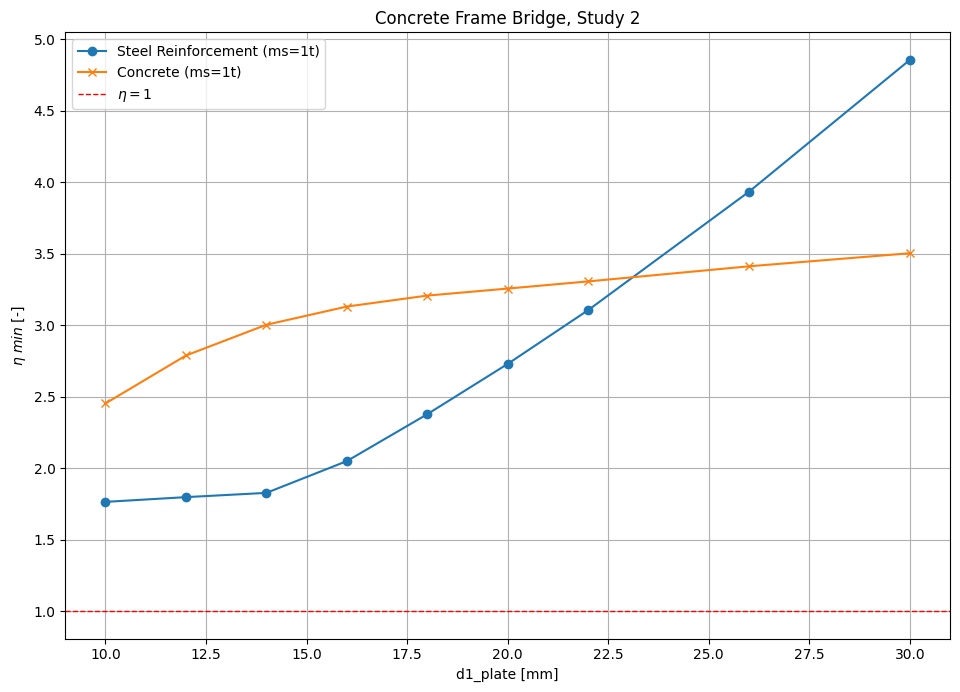

In [4]:
cm = 1/2.54
plt.figure(figsize = (29*cm, 20*cm))
plt.title('Concrete Frame Bridge, Study {}'.format(idx_s))
plt.plot(df_xy[var_par], df_xy['eta_min_s'],label='Steel Reinforcement (ms=1t)', marker='o')
plt.plot(df_xy[var_par], df_xy['eta_min_c'], label='Concrete (ms=1t)', marker='x')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\eta=1$')
plt.xlabel(var_par+unit)
plt.ylabel('$\eta \ min$ [-]')
plt.grid()
plt.legend(loc = "upper left")

## 3D plot of most critical point

In [24]:
# extract information about the bridge that we need to plot the bridge

ID=0

t_p=df_xy['t_p'][ID]
L=df_xy['L'][ID]
b=df_xy['b1'][ID]
h_w=df_xy['h_w'][ID]
h=h_w+t_p

x_s=df_xy['x_s'][ID]
y_s=df_xy['y_s'][ID]
z_s=df_xy['z_s'][ID]
layer=df_xy['Location_s'][ID]
eta_s=df_xy['eta_min_s'][ID]

x_c=df_xy['x_c'][ID]
y_c=df_xy['y_c'][ID]
z_c=df_xy['z_c'][ID]
location=df_xy['Location_c'][ID]
eta_c=df_xy['eta_min_c'][ID]

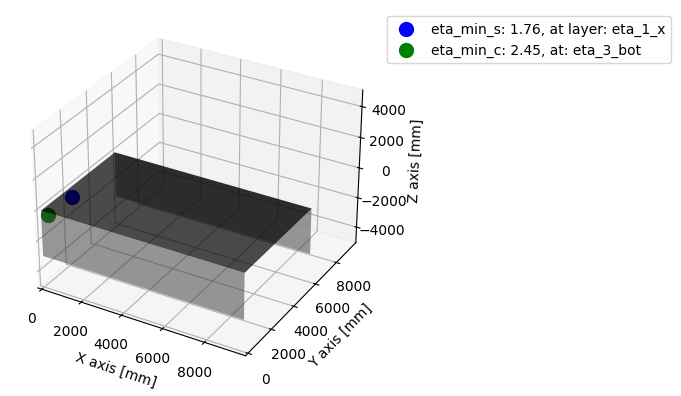

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p

z= np.linspace(0, -h, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surfaces
ax.plot_surface(x_p, y_p, z_p, alpha=0.7, rstride=100, cstride=100, color='black')
ax.plot_surface(x_w, y_w1, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')
ax.plot_surface(x_w, y_w2, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')



# Plotting the specific point
ax.scatter(x_s, y_s, z_s, color='blue', s=100, label='eta_min_s: {:0.2f}, at layer: {}'.format(eta_s, layer)) 
ax.scatter(x_c, y_c, z_c, color='green', s=100, label='eta_min_c: {:0.2f}, at: {}'.format(eta_c, location)) 

# Setting labels
ax.set_xlabel('X axis [mm]')
ax.set_ylabel('Y axis [mm]')
ax.set_zlabel('Z axis [mm]')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

# Calculate aspect ratio
max_range = np.array([x_w.max()-x_w.min(), y_p.max()-y_p.min(), z_w.max()-z_w.min()]).max()


ax.set_xlim(0,max_range)
ax.set_ylim(0,max_range)
ax.set_zlim(-max_range/2,max_range/2)

# Show plot
plt.show()
